In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## create mortality data csv files

In [6]:
df_mortality = pd.read_csv('../data/wonder_mortality.txt', sep = '\t')

In [7]:
df_mortality.Race.value_counts()

White                               3146
Black or African American           2211
American Indian or Alaska Native    1345
Asian or Pacific Islander           1311
Name: Race, dtype: int64

In [8]:
df_mortality[df_mortality.Race == 'Black or African American'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/black_total_mortality.csv')

In [9]:
df_mortality[df_mortality.Race == 'White'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/white_total_mortality.csv')

In [10]:
df_mortality_infant = pd.read_csv('../data/mortality_infant.txt', sep = '\t')

In [11]:
df_mortality_infant[df_mortality_infant.Race == 'Black or African American'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/black_infant_mortality.csv')
df_mortality_infant[df_mortality_infant.Race == 'White'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/white_infant_mortality.csv')

## loading data

In [2]:
df_black_total_mortality = pd.read_csv('../data/black_total_mortality.csv', index_col = 0)
df_white_total_mortality = pd.read_csv('../data/white_total_mortality.csv', index_col = 0)
df_black_infant_mortality = pd.read_csv('../data/black_infant_mortality.csv', index_col = 0)
df_white_infant_mortality = pd.read_csv('../data/white_infant_mortality.csv', index_col = 0)

In [3]:
for i in ['black', 'white']:
    for j in ['infant', 'total']:
        exec("df_" + i + "_" + j +"_mortality['County_Split'] = df_" + i + "_" + j +"_mortality.County.str.split(',').apply(lambda x: x[0])")
        exec("df_" + i + "_" + j +"_mortality['County_Name'] = df_" + i + "_" + j +"_mortality.County_Split.str.split().apply(lambda x: x[0])")
        exec("df_" + i + "_" + j +"_mortality['State'] = df_" + i + "_" + j +"_mortality.County.str.split(',').apply(lambda x: x[1])")
        eval("print('County number for " + i + " " + j + " csv: ', len(df_" + i + "_" + j +"_mortality.County.unique()))")
        

County number for black infant csv:  1033
County number for black total csv:  2211
County number for white infant csv:  2490
County number for white total csv:  3146


## the stats for black infant group is less than half of the counterpart... many counties don't record the black infant stat? but record the white infant stat? probably only going to study the counties that are in the black infant csv group

In [4]:
df_infant_stat_counties_white_no_black = np.setdiff1d(df_white_infant_mortality.County.unique(), df_black_infant_mortality.County.unique()) 

In [5]:
df_infant_stat_counties_black_no_white = np.setdiff1d(df_black_infant_mortality.County.unique(), df_white_infant_mortality.County.unique()) 

In [6]:
len(df_infant_stat_counties_black_no_white)

78

In [7]:
len(df_infant_stat_counties_white_no_black)

1535

In [8]:
df_black_total_mortality = df_black_total_mortality[df_black_total_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)
df_white_total_mortality = df_white_total_mortality[df_white_total_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)
df_white_infant_mortality = df_white_infant_mortality[df_white_infant_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)

In [9]:
for i in ['black', 'white']:
    for j in ['infant', 'total']:
        exec("df_" + i + "_" + j +"_mortality['Death_Population_Ratio'] = df_" + i + "_" + j +"_mortality['Deaths']/ df_" + i + "_" + j +"_mortality['Population']")

In [10]:
df_black_total_mortality["Race"] = 'Black'
df_black_infant_mortality["Race"] = 'Black'
df_white_total_mortality["Race"] = 'White'
df_white_infant_mortality["Race"] = 'White'

In [11]:
df_total_mortality = pd.concat([df_black_total_mortality, df_white_total_mortality])
df_infant_mortality = pd.concat([df_black_infant_mortality, df_white_infant_mortality])

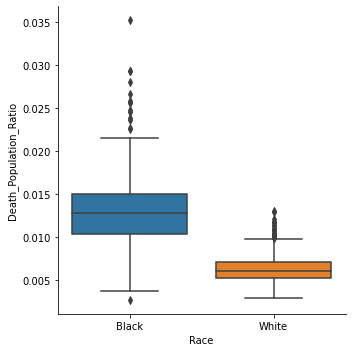

In [12]:
sns.catplot(data=df_infant_mortality, kind="box", x="Race", y="Death_Population_Ratio")

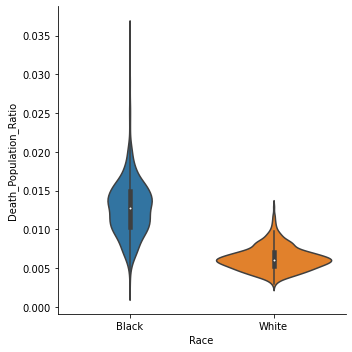

In [13]:
sns.catplot(data=df_infant_mortality, kind="violin", x="Race", y="Death_Population_Ratio")

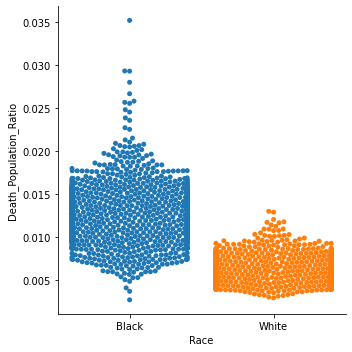

In [14]:
sns.catplot(data=df_infant_mortality, kind="swarm", x="Race", y="Death_Population_Ratio")

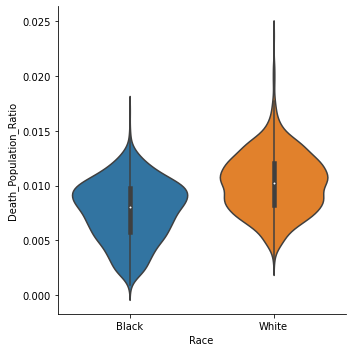

In [15]:
sns.catplot(data=df_total_mortality, kind="violin", x="Race", y="Death_Population_Ratio")

## Sundown town data loading

In [16]:
df_sundown = pd.read_csv('../data/sundown_with_counties.csv')

In [17]:
df_sundown.head(2)

,Unnamed: 0,id,city,state,status,county
0,0,8,Anna,IL,Surely,"Shelby County, IL"
1,1,9,Glendale,PA,NaN,"Boulder County, PA"


In [18]:
df_sundown['County_with_states'] = [i + ', ' + df_sundown.state.values[idx] for idx, i in enumerate(df_sundown.county.values)]

In [19]:
len(df_sundown)

2335

In [20]:
df_sundown['County_with_states'].drop_duplicates()

0         Shelby County, IL, IL
1        Boulder County, PA, PA
2          Smith County, MS, MS
3       Sheridan County, MS, MS
4           Pike County, MS, MS
                 ...           
2329    Bradford County, TX, TX
2330        Vigo County, OK, OK
2332      Sabine County, OK, OK
2333       Union County, NJ, NJ
2334    Stoddard County, NJ, NJ
Name: County_with_states, Length: 1615, dtype: object

In [21]:
len(df_sundown[['state','county']].drop_duplicates())

1615

In [22]:
len(df_sundown.county.unique())

1614

In [23]:
df_sundown.state = df_sundown.state.str.upper()

In [24]:
sundown_state_stat = df_sundown.state.value_counts()

In [25]:
df_sundown_state_stats = pd.DataFrame(sundown_state_stat).reset_index()

In [26]:
df_sundown_state_stats = df_sundown_state_stats.rename(columns = {"index": "State", "state":"# of Sundown Town"})

Text(0.5, 1.0, '# of Sundown Towns in Different State')

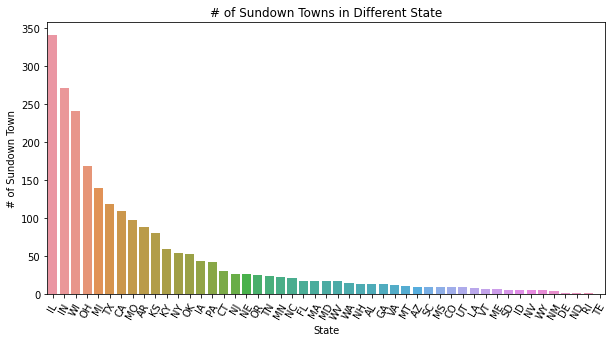

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
chart = sns.barplot(data = df_sundown_state_stats, x = 'State', y = '# of Sundown Town')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('# of Sundown Towns in Different State')

In [159]:
df_sundown_state_stats = df_sundown_state_stats.sort_values(by = '# of Sundown Town', ascending = False)

Text(0.5, 1.0, 'Normalized # of Sundown Towns in Different State')

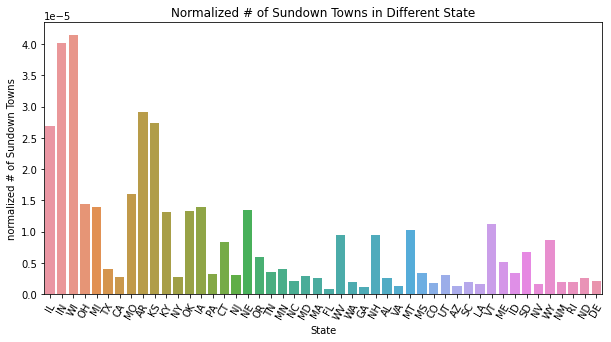

In [160]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data = df_sundown_state_stats, x = 'State', y = 'normalized # of Sundown Towns')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('Normalized # of Sundown Towns in Different State')

In [27]:
df_abb_state = pd.read_csv('../data/states.csv')

In [28]:
code2state = dict(df_abb_state[['State Code', 'State']].values)
state2code = dict(df_abb_state[['State','State Code']].values)

In [29]:
df_population = pd.read_excel('../data/population.xlsx')

In [30]:
df_population = df_population[['table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)', 'Unnamed: 12']].iloc[4:59]

In [31]:
df_population = df_population.rename(columns={'table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts)': 'Geography', 'Unnamed: 12': 'Population'})

In [32]:
df_population["Geography"] = df_population.Geography.str.split('.').apply(lambda x: x[-1])

In [33]:
df_population_state = df_population.loc[8:]

In [34]:
df_population_state["Code"] = df_population_state.Geography.apply(lambda x: state2code[x])

In [35]:
df_sundown_state_stats = df_sundown_state_stats.merge(df_population_state, left_on='State', right_on='Code')

In [36]:
df_sundown_state_stats['normalized # of Sundown Towns'] = df_sundown_state_stats['# of Sundown Town'].values/df_sundown_state_stats['Population'].values

In [37]:
df_sundown_state_stats = df_sundown_state_stats.sort_values(by = 'normalized # of Sundown Towns', ascending = False)

In [38]:
top10_states = df_sundown_state_stats.iloc[:10].State.values
bottom10_states = df_sundown_state_stats.iloc[-10:].State.values

Text(0.5, 1.0, 'Normalized # of Sundown Towns in Different State')

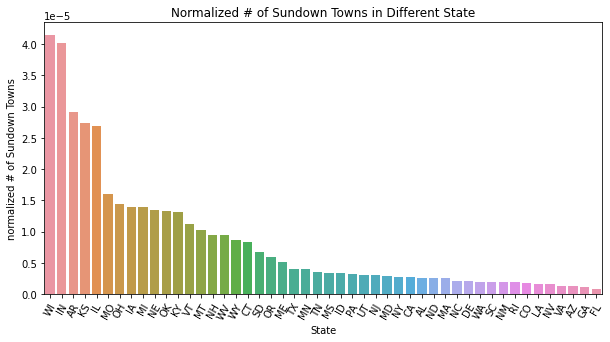

In [39]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data = df_sundown_state_stats, x = 'State', y = 'normalized # of Sundown Towns')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('Normalized # of Sundown Towns in Different State')

In [40]:
df_sundown_state_stats = df_sundown_state_stats.merge(df_abb_state[['State Code', 'Region']], left_on = 'Code', right_on = 'State Code')

In [41]:
df_sundown_state_stats.head(2)

,State,# of Sundown Town,Geography,Population,Code,normalized # of Sundown Towns,State Code,Region
0,WI,241,Wisconsin,5822434.0,WI,0.000041,WI,Midwest
1,IN,271,Indiana,6732219.0,IN,0.000040,IN,Midwest


In [42]:
df_sundown_region_stats = df_sundown_state_stats.groupby(by = 'Region')[['# of Sundown Town', 'Population']].sum()

In [43]:
df_sundown_region_stats['Normalized # of Sundown Towns'] = df_sundown_region_stats['# of Sundown Town'].values/df_sundown_region_stats['Population'].values

In [44]:
df_sundown_region_stats = df_sundown_region_stats.reset_index()

Text(0.5, 1.0, 'Normalized # of Sundown Towns in Different Region')

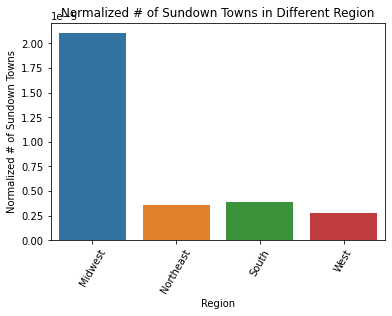

In [45]:
chart = sns.barplot(data = df_sundown_region_stats, x = 'Region', y = 'Normalized # of Sundown Towns')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('Normalized # of Sundown Towns in Different Region')

Text(0.5, 1.0, 'Normalized # of Sundown Towns in Different Region')

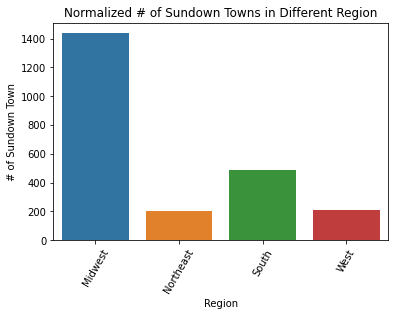

In [46]:
chart = sns.barplot(data = df_sundown_region_stats, x = 'Region', y = '# of Sundown Town')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('Normalized # of Sundown Towns in Different Region')

In [47]:
df_sundown_region_stats.to_csv('../data/df_sundown_town_v2.csv')

In [49]:
df_sundown_state_stats.to_csv('../data/df_sundown_town_states_stat.csv')

In [172]:
len(df_sundown.state.unique())

49

In [173]:
len(df_sundown.city.unique())

1856

In [174]:
df_sundown.city.unique()

array(['Anna', 'Glendale', 'Mize', ..., 'Noble', 'Garwood', 'Baker'],
      dtype=object)

In [50]:
len(np.intersect1d(df_sundown.city.unique(), df_black_infant_mortality.County_Name.unique()))

159

In [51]:
len(np.intersect1d(df_sundown.city.unique(), df_black_infant_mortality.County_Split.unique()))

0

In [53]:
len(np.intersect1d(df_black_infant_mortality.County.values, df_sundown['County_with_states'].values))

5

In [186]:
intersect = np.intersect1d(df_black_infant_mortality.County.values, df_sundown['County_with_states'].values)

In [199]:
df_black_infant_mortality.State = df_black_infant_mortality.State.str.strip()

In [194]:
top10_states

array(['WI', 'IN', 'AR', 'KS', 'IL', 'MO', 'OH', 'IA', 'MI', 'NE'],
      dtype=object)

In [200]:
df_black_infant_top10 = df_black_infant_mortality[df_black_infant_mortality.State.isin(top10_states)]
df_black_infant_bottom10 = df_black_infant_mortality[df_black_infant_mortality.State.isin(bottom10_states)]

In [203]:
df_black_infant_general = df_black_infant_mortality[~df_black_infant_mortality.County.isin(df_black_infant_top10.County.values)]

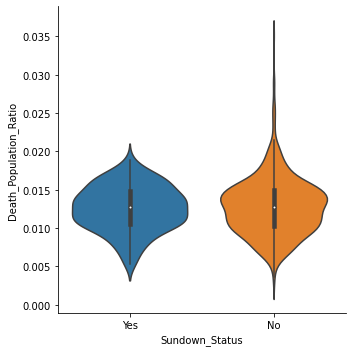

In [204]:
df_black_infant_top10['Sundown_Status'] = 'Yes'
df_black_infant_general['Sundown_Status'] = 'No'

df_sundown_mortality_black_infant = pd.concat([df_black_infant_top10, df_black_infant_general])

sns.catplot(data=df_sundown_mortality_black_infant, kind="violin", x="Sundown_Status", y="Death_Population_Ratio")

In [45]:
df_temp = df_black_infant_mortality[df_black_infant_mortality.County.isin(intersect)]
df_temp2 = df_black_infant_mortality[~df_black_infant_mortality.County.isin(intersect)]

In [46]:
df_sundown_mortality_black_infant

,County,County Code,Deaths,Population,County_Split,County_Name,State,Sundown_Status
1,"Baldwin County, AL",1003.0,69.0,4811.0,Baldwin County,Baldwin,AL,Yes
21,"Etowah County, AL",1055.0,60.0,4276.0,Etowah County,Etowah,AL,Yes
25,"Jefferson County, AL",1073.0,1287.0,75362.0,Jefferson County,Jefferson,AL,Yes
48,"Walker County, AL",1127.0,23.0,1194.0,Walker County,Walker,AL,Yes
54,"Maricopa County, AZ",4013.0,813.0,73697.0,Maricopa County,Maricopa,AZ,Yes
...,...,...,...,...,...,...,...,...
1021,"Mercer County, WV",54055.0,11.0,1362.0,Mercer County,Mercer,WV,No
1022,"Monongalia County, WV",54061.0,18.0,973.0,Monongalia County,Monongalia,WV,No
1023,"Raleigh County, WV",54081.0,25.0,1624.0,Raleigh County,Raleigh,WV,No
1026,"Kenosha County, WI",55059.0,53.0,4807.0,Kenosha County,Kenosha,WI,No


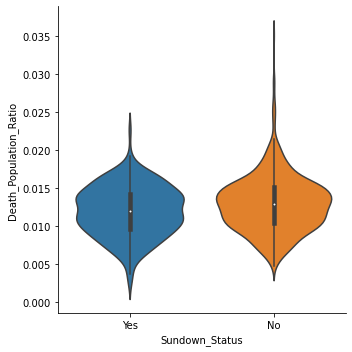

In [47]:
df_temp['Sundown_Status'] = 'Yes'
df_temp2['Sundown_Status'] = 'No'
df_sundown_mortality_black_infant = pd.concat([df_temp, df_temp2])

sns.catplot(data=df_sundown_mortality_black_infant, kind="violin", x="Sundown_Status", y="Death_Population_Ratio")

In [162]:
df_sundown_mortality_black_infant.Sundown_Status.value_counts()

No     875
Yes    158
Name: Sundown_Status, dtype: int64

# process mortality history data

In [5]:
import pandas as pd
df = pd.read_csv('../output.csv')

In [32]:
df_transform = pd.DataFrame()

In [15]:
df = df.rename(columns={'Unnamed: 0': 'Year', 'Unnamed: 2': 'Infant', 'Unnamed: 3': '28 Days', 'Neonatal 1': '7 Days', 'Unnamed: 6': 'Postneonatal'})[['Year', 'Infant', '28 Days', '7 Days', 'Postneonatal']]

In [53]:
start = 42
end = 53
df.iloc[start:end]

,Year,Infant,28 Days,7 Days,Postneonatal
42,1980. . . . . . . . . . . . . . ...,22.2,14.6,12.3,7.6
43,1990. . . . . . . . . . . . . . ...,18.0,11.6,9.7,6.4
44,1995. . . . . . . . . . . . . . ...,15.1,9.8,8.2,5.3
45,2000. . . . . . . . . . . . . . ...,14.1,9.4,7.6,4.7
46,2004. . . . . . . . . . . . . . ...,13.8,9.1,7.3,4.7
47,2005. . . . . . . . . . . . . . ...,13.7,9.1,7.3,4.7
48,2010. . . . . . . . . . . . . . ...,11.6,7.5,6.0,4.1
49,2012. . . . . . . . . . . . . . ...,11.2,7.3,6.0,3.9
50,2013. . . . . . . . . . . . . . ...,11.2,7.4,6.1,3.8
51,2014. . . . . . . . . . . . . . ...,11.0,7.3,6.0,3.7


In [54]:
df.loc[start:end, 'Year'] = df.iloc[start:end].Year.str.split().apply(lambda x: x[0]).str.split('.').apply(lambda x:x[0])

In [55]:
df_all_races = df.iloc[start:end]
df_all_races['Race'] = 'Race of Mother: Black'

/Users/kexinhuang/opt/anaconda3/envs/gradio_deeppurpose/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [56]:
df_transform = df_transform.append(df_all_races)

In [58]:
df_transform.to_csv('../data/mortality_history_race.csv')

In [142]:
df_transform[df_transform.Race == 'All']

array(['29.2', '26.0', '20.0', '12.6', '9.2', '7.6', '6.9', '6.8', '6.9',
       '6.1', '6.0', '6.0', '5.8', '5.9'], dtype=object)

In [143]:
df_transform

,Year,Infant,28 Days,7 Days,Postneonatal,Race
3,1950,29.2,20.5,17.8,8.7,All
4,1960,26.0,18.7,16.7,7.3,All
5,1970,20.0,15.1,13.6,4.9,All
6,1980,12.6,8.5,7.1,4.1,All
7,1990,9.2,5.8,4.8,3.4,All
8,1995,7.6,4.9,4.0,2.7,All
9,2000,6.9,4.6,3.7,2.3,All
10,2004,6.8,4.5,3.6,2.3,All
11,2005,6.9,4.5,3.6,2.3,All
12,2010,6.1,4.0,3.2,2.1,All


In [148]:
df_transform[['Infant','28 Days', '7 Days', 'Postneonatal']] = df_transform[['Infant','28 Days', '7 Days', 'Postneonatal']].astype(float)

Text(0.5, 1.0, 'Infant Mortality Over the Year vs Races')

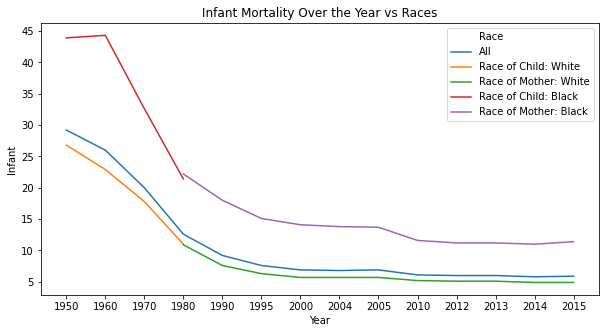

In [154]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(data = df_transform, x = 'Year', y = 'Infant', hue = 'Race')
chart.set_title('Infant Mortality Over the Year vs Races')

Text(0.5, 1.0, '28 Days Mortality Over the Year vs Races')

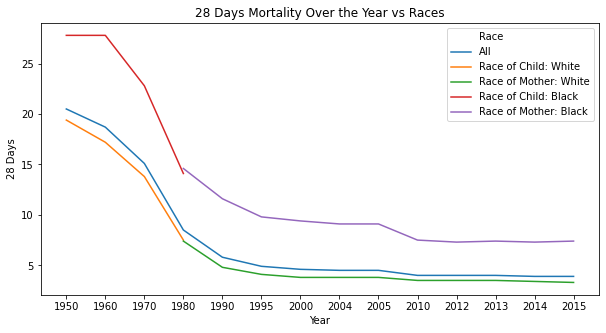

In [155]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(data = df_transform, x = 'Year', y = '28 Days', hue = 'Race')
chart.set_title('28 Days Mortality Over the Year vs Races')

Text(0.5, 1.0, 'Infant Mortality Over the Year vs Races')

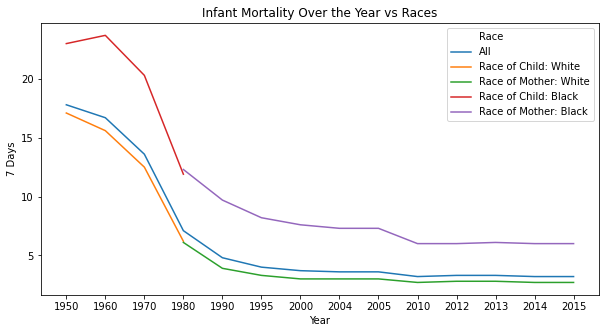

In [156]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(data = df_transform, x = 'Year', y = '7 Days', hue = 'Race')
chart.set_title('Infant Mortality Over the Year vs Races')

Text(0.5, 1.0, 'Infant Mortality Over the Year vs Races')

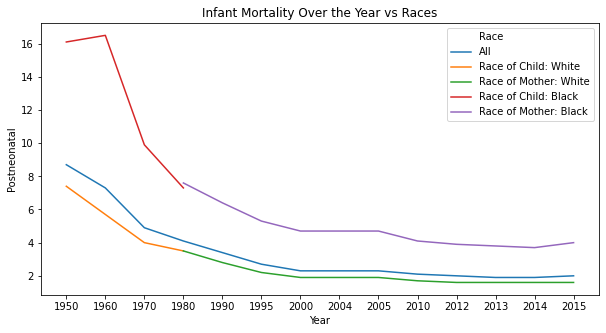

In [157]:
plt.figure(figsize=(10,5))
chart = sns.lineplot(data = df_transform, x = 'Year', y = 'Postneonatal', hue = 'Race')
chart.set_title('Infant Mortality Over the Year vs Races')

In [228]:
alpha*(beta+1)/(alpha + beta + 1)**2/(alpha + beta + 2)

0.020833333333333332